In [3]:
! pip install -q kaggle

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                              Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38          24644        522  1.0              
prasad22/weather-data                                               Weather Data                                         43MB  2024-05-18 14:27:35           1490         40  1.0              
emirhanai/social-media-usage-and-emotional-well-being               Social Media Usage and Emotional Well-Being           8KB  2024-05-19 18:25:52           1791         35

In [5]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:14<00:00, 67.9MB/s]
100% 1.06G/1.06G [00:14<00:00, 79.4MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os

# ***LOAD THE DATA***

In [8]:

train_dir = '/content/dogs_vs_cats/train'
validation_dir = '/content/dogs_vs_cats/test'

train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(150, 150),
  batch_size=32,
)

validation_datagen = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  image_size=(150, 150),
  batch_size=32,
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


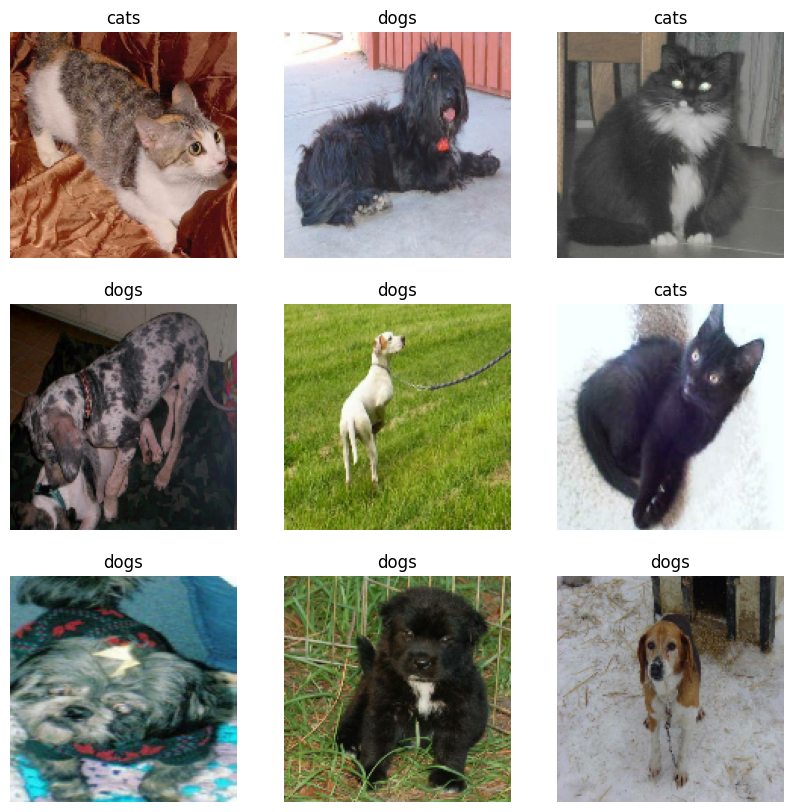

In [9]:
class_names = ['cats', 'dogs']
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_datagen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [10]:

train_dataset = train_datagen.take(157)
validation_dataset = validation_datagen.take(157)


In [11]:

print('Number of samples in train dataset:', len(list(train_dataset)))
print('Number of samples in validation dataset:', len(list(validation_dataset)))


Number of samples in train dataset: 157
Number of samples in validation dataset: 157


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models


def build_model():
    model = models.Sequential([
        layers.InputLayer(input_shape=(150, 150, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model



In [13]:
train_dir = '/content/dogs_vs_cats/train'
validation_dir = '/content/dogs_vs_cats/test'



In [14]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(150, 150),
  batch_size=32,
)

validation_datagen = tf.keras.preprocessing.image_dataset_from_directory(
  validation_dir,
  image_size=(150, 150),
  batch_size=32,
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
import tensorflow as tf
train_dir = '/content/dogs_vs_cats/train'
validation_dir = '/content/dogs_vs_cats/test'

train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
)

validation_datagen = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [16]:
train_dataset = train_datagen.take(16)
validation_dataset = validation_datagen.take(16)


In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

def extract_features(dataset):
    features = []
    labels = []
    for images, label_batch in dataset:
        preprocessed_images = preprocess_input(images)
        features_batch = base_model.predict(preprocessed_images)
        features.append(features_batch)
        labels.append(label_batch.numpy())
    return np.concatenate(features), np.concatenate(labels)

train_features, train_labels = extract_features(train_dataset)
validation_features, validation_labels = extract_features(validation_dataset)

train_features = train_features.reshape((train_features.shape[0], -1))
validation_features = validation_features.reshape((validation_features.shape[0], -1))


1/1 [==============================] - 6s 6s/step


# **SVM**

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
validation_features = scaler.transform(validation_features)

model = SVC(C=10, kernel='rbf', gamma=0.001)
model.fit(train_features, train_labels)

accuracy = model.score(validation_features, validation_labels)
print('Model accuracy:', accuracy)


Model accuracy: 0.490234375


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

validation_predictions = model.predict(validation_features)


cm = confusion_matrix(validation_labels, validation_predictions)
print('Confusion matrix:\n', cm)

precision = precision_score(validation_labels, validation_predictions, average='binary')
recall = recall_score(validation_labels, validation_predictions, average='binary')
f1 = f1_score(validation_labels, validation_predictions, average='binary')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

report = classification_report(validation_labels, validation_predictions, target_names=['cats', 'dogs'])
print('Classification report:\n', report)

Confusion matrix:
 [[  7 261]
 [  0 244]]
Precision: 0.48316831683168315
Recall: 1.0
F1 score: 0.6515353805073432
Classification report:
               precision    recall  f1-score   support

        cats       1.00      0.03      0.05       268
        dogs       0.48      1.00      0.65       244

    accuracy                           0.49       512
   macro avg       0.74      0.51      0.35       512
weighted avg       0.75      0.49      0.34       512



# ***Applying SMOTE***

In [20]:
!pip install -q imbalanced-learn


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

train_features = train_features.reshape((train_features.shape[0], -1))
validation_features = validation_features.reshape((validation_features.shape[0], -1))

smote = SMOTE(random_state=42)
train_features_smote, train_labels_smote = smote.fit_resample(train_features, train_labels)

scaler = StandardScaler()
train_features_smote = scaler.fit_transform(train_features_smote)
validation_features = scaler.transform(validation_features)

model = SVC(C=10, kernel='rbf', gamma=0.001)
model.fit(train_features_smote, train_labels_smote)

validation_predictions = model.predict(validation_features)
accuracy = model.score(validation_features, validation_labels)
print('Model accuracy after SMOTE:', accuracy)

cm = confusion_matrix(validation_labels, validation_predictions)
print('Confusion matrix:\n', cm)

precision = precision_score(validation_labels, validation_predictions, average='binary')
recall = recall_score(validation_labels, validation_predictions, average='binary')
f1 = f1_score(validation_labels, validation_predictions, average='binary')

print('Precision after SMOTE:', precision)
print('Recall after SMOTE:', recall)
print('F1 score after SMote:', f1)

report = classification_report(validation_labels, validation_predictions, target_names=['cats', 'dogs'])
print('Classification report after SMOTE:\n', report)


Model accuracy after SMOTE: 0.509765625
Confusion matrix:
 [[ 19 249]
 [  2 242]]
Precision after SMOTE: 0.49287169042769857
Recall after SMOTE: 0.9918032786885246
F1 score after SMote: 0.6585034013605442
Classification report after SMOTE:
               precision    recall  f1-score   support

        cats       0.90      0.07      0.13       268
        dogs       0.49      0.99      0.66       244

    accuracy                           0.51       512
   macro avg       0.70      0.53      0.39       512
weighted avg       0.71      0.51      0.38       512



# ***Hyperparameter Tuning for SVM***

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(train_features, train_labels)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.8s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [23]:
print("Best parameters found: ", grid.best_params_)
print("Best accuracy found: ", grid.best_score_)

validation_predictions = grid.predict(validation_features)
accuracy = grid.score(validation_features, validation_labels)
print('Validation accuracy with tuned parameters:', accuracy)

Best parameters found:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best accuracy found:  0.9511326860841424
Validation accuracy with tuned parameters: 0.943359375


# ***GRID SEARCH FOR HYPERPARAMETER OPTIMIZATION***

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report


scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
validation_features = scaler.transform(validation_features)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(train_features, train_labels)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   4.7s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.7s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [25]:
print("Best parameters found: ", grid.best_params_)
print("Best accuracy found: ", grid.best_score_)

validation_predictions = grid.predict(validation_features)
accuracy = grid.score(validation_features, validation_labels)
print('Validation accuracy with tuned parameters:', accuracy)

cm = confusion_matrix(validation_labels, validation_predictions)
print('Confusion matrix:\n', cm)

precision = precision_score(validation_labels, validation_predictions, average='binary')
recall = recall_score(validation_labels, validation_predictions, average='binary')
f1 = f1_score(validation_labels, validation_predictions, average='binary')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

report = classification_report(validation_labels, validation_predictions, target_names=['cats', 'dogs'])
print('Classification report:\n', report)


Best parameters found:  {'C': 0.1, 'gamma': 0.001, 'kernel': 'sigmoid'}
Best accuracy found:  0.9511326860841424
Validation accuracy with tuned parameters: 0.943359375
Confusion matrix:
 [[258  10]
 [ 19 225]]
Precision: 0.9574468085106383
Recall: 0.9221311475409836
F1 score: 0.9394572025052192
Classification report:
               precision    recall  f1-score   support

        cats       0.93      0.96      0.95       268
        dogs       0.96      0.92      0.94       244

    accuracy                           0.94       512
   macro avg       0.94      0.94      0.94       512
weighted avg       0.94      0.94      0.94       512

